---
- 작성자 : 이휘
- 작성일 : 2024-06-04
---

In [1]:
# 데이터 프레임과 계산을 위한 라이브러리
import pandas as pd
import numpy as np

# 차트
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 차트 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
# 날짜, 요일, 홈팀, 원정팀, 장소, 관중 수 데이터 불러오기
data_01 = pd.read_csv("./Data/kiwoom_heroes_info(2022~2024).csv")
data_01.head()

,날짜,요일,홈팀,원정팀,장소,관중 수
0,2022-04-02,토,키움,롯데,고척,8257
1,2022-04-03,일,키움,롯데,고척,6115
2,2022-04-05,화,키움,LG,고척,2298
3,2022-04-06,수,키움,LG,고척,2304
4,2022-04-07,목,키움,LG,고척,2055


In [5]:
# 속성 확인
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      173 non-null    object
 1   요일      173 non-null    object
 2   홈팀      173 non-null    object
 3   원정팀     173 non-null    object
 4   장소      173 non-null    object
 5   관중 수    173 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 8.2+ KB


In [6]:
# 날짜 데이터를 datetime으로 type으규식 로 변환할 수 있게 정사용하여 데이터 변환
data_01['날짜'] = data_01['날짜'].str.replace(r'\([가-힣]\)', '', regex=True)
# 날짜 컬럼을 datetime으로 type 변환
data_01['날짜'] = pd.to_datetime(data_01['날짜'])
data_01.head()

,날짜,요일,홈팀,원정팀,장소,관중 수
0,2022-04-02,토,키움,롯데,고척,8257
1,2022-04-03,일,키움,롯데,고척,6115
2,2022-04-05,화,키움,LG,고척,2298
3,2022-04-06,수,키움,LG,고척,2304
4,2022-04-07,목,키움,LG,고척,2055


In [7]:
# 속성 확인
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      173 non-null    datetime64[ns]
 1   요일      173 non-null    object        
 2   홈팀      173 non-null    object        
 3   원정팀     173 non-null    object        
 4   장소      173 non-null    object        
 5   관중 수    173 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 8.2+ KB


In [8]:
# 날짜, 요일, 홈팀, 원정팀, 장소, 관중 수 데이터 불러오기
data_02 = pd.read_csv("./Data/test.csv")
data_02.head()

,관중 수,요일,원정팀,시작시간
0,8257,토,롯데,14:00
1,6115,일,롯데,14:00
2,2298,화,LG,18:30
3,2304,수,LG,18:30
4,2055,목,LG,18:30


In [9]:
# 필요한 데이터 병합하기
kiwoom = pd.concat([data_01['날짜'],data_01['요일'],data_01['원정팀'],data_01['관중 수'],data_02['시작시간'],],axis=1)
kiwoom

,날짜,요일,원정팀,관중 수,시작시간
0,2022-04-02,토,롯데,8257,14:00
1,2022-04-03,일,롯데,6115,14:00
2,2022-04-05,화,LG,2298,18:30
3,2022-04-06,수,LG,2304,18:30
4,2022-04-07,목,LG,2055,18:30
...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30
169,2024-05-23,목,NC,3897,18:30
170,2024-05-31,금,SSG,5680,18:30
171,2024-06-01,토,SSG,10462,17:00


In [10]:
# 속성 확인
kiwoom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      173 non-null    datetime64[ns]
 1   요일      173 non-null    object        
 2   원정팀     173 non-null    object        
 3   관중 수    173 non-null    int64         
 4   시작시간    173 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 6.9+ KB


In [11]:
# 연도, 월 컬럼으로 분리하기
kiwoom['연도'] = kiwoom['날짜'].dt.year
kiwoom['월'] = kiwoom['날짜'].dt.month
kiwoom

,날짜,요일,원정팀,관중 수,시작시간,연도,월
0,2022-04-02,토,롯데,8257,14:00,2022,4
1,2022-04-03,일,롯데,6115,14:00,2022,4
2,2022-04-05,화,LG,2298,18:30,2022,4
3,2022-04-06,수,LG,2304,18:30,2022,4
4,2022-04-07,목,LG,2055,18:30,2022,4
...,...,...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30,2024,5
169,2024-05-23,목,NC,3897,18:30,2024,5
170,2024-05-31,금,SSG,5680,18:30,2024,5
171,2024-06-01,토,SSG,10462,17:00,2024,6


In [12]:
# 속성 확인
kiwoom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      173 non-null    datetime64[ns]
 1   요일      173 non-null    object        
 2   원정팀     173 non-null    object        
 3   관중 수    173 non-null    int64         
 4   시작시간    173 non-null    object        
 5   연도      173 non-null    int32         
 6   월       173 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 8.2+ KB


In [13]:
# 요일 컬럼 속성 확인
kiwoom['요일'].unique()

array(['토', '일', '화', '수', '목', '금'], dtype=object)

----
### 목표 : 2022~2023년 데이터와 2024년 데이터 분리하기
> 관중 수 예측 모델을 만들어 2022~2023년 데이터를 train 데이터로 학습시키고 <br>
학습한 예측 모델을 가지고 2024 데이터를 test 데이터로 사용하자

In [14]:
# 2022~2023년 데이터와 2024년 데이터 분리
kiwoom_2022_2023 = kiwoom[(kiwoom['연도'] == 2022) | (kiwoom['연도'] == 2023)]
kiwoom_2024 = kiwoom[kiwoom['연도'] == 2024]
kiwoom_2024 = kiwoom_2024.reset_index(drop=True)

----
#### 2022~2023년 요일별 평균 관중 수

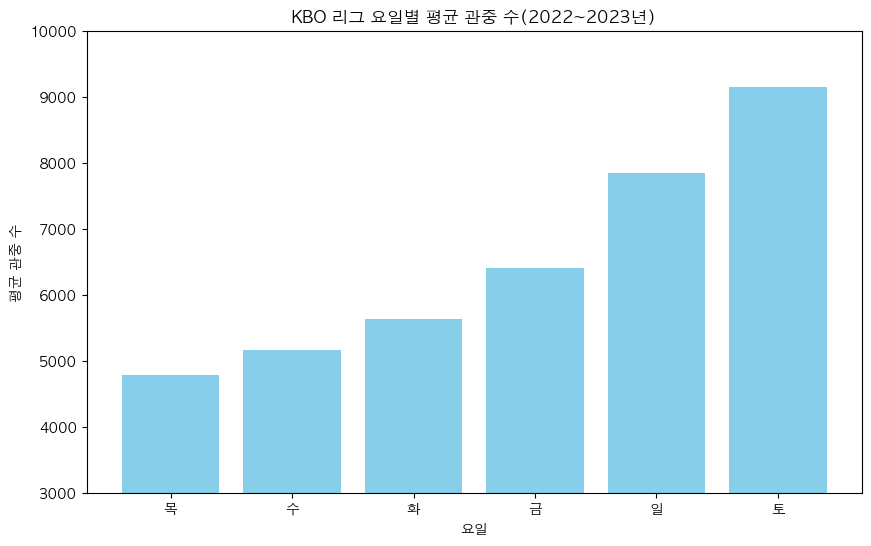

In [15]:
# 데이터 불러오기 (kiwoom_2022_2023 DataFrame)
data = kiwoom_2022_2023.groupby('요일')['관중 수'].mean().sort_values()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')  # 요일 이름 사용
plt.xlabel("요일")
plt.ylabel("평균 관중 수")
plt.ylim(3000,10000)
plt.title("KBO 리그 요일별 평균 관중 수(2022~2023년)")

# 그래프 표시
plt.show()

> 목요일이 가장 평균 관중 수가 가장 낮고, 토요일이 가장 높다. <br>
> 상관 관계를 위해 위의 데이터를 수치화 작업하자 <br>
> 목요일 -> 1<br>
> 수요일 -> 2<br>
> 화요일 -> 3<br>
> 금요일 -> 4<br>
> 일요일 -> 5<br>
> 토요일 -> 6<br>

In [16]:
# 변환 맵 정의
day_mapping = {
    '목': 1,
    '수': 2,
    '화': 3,
    '금': 4,
    '일': 5,
    '토': 6
}

# 변환 적용
kiwoom_2022_2023['요일'].replace(day_mapping, inplace=True)
kiwoom_2024['요일'].replace(day_mapping, inplace=True)

In [17]:
kiwoom_2022_2023[['요일','관중 수']].corr()

,요일,관중 수
요일,1.000000,0.437113
관중 수,0.437113,1.000000


### 시작 시간 통일
- 야구 시작시간<br>
- 주말 -> 14:00, 17:00<br>
- 평일 -> 18:30<br>
- 혹서기 한정 -> 18:00(7,8월일 때 17:00 경기를 1시간 미룸)

In [18]:
kiwoom_2022_2023['시작시간'].unique()

array(['14:00', '18:30', '17:00', '18:00'], dtype=object)

In [19]:
# 2022~2023년 시작시간이 18:00인 데이터 확인(2건)
kiwoom_2022_2023[kiwoom_2022_2023['시작시간'] == '18:00']

,날짜,요일,원정팀,관중 수,시작시간,연도,월
108,2023-07-01,6,SSG,10836,18:00,2023,7
120,2023-07-29,6,삼성,11851,18:00,2023,7


In [20]:
# 총 2건 밖에 안되므로 17:00 값으로 대체
# 18:00 시작시간 데이터 선택
target_rows = kiwoom_2022_2023[kiwoom_2022_2023['시작시간'] == '18:00']

# 시작시간 변경
kiwoom_2022_2023.loc[target_rows.index, '시작시간'] = '17:00'

In [21]:
# 시작시간 컬럼 속성 확인
kiwoom_2022_2023['시작시간'].unique()

array(['14:00', '18:30', '17:00'], dtype=object)

----
#### 2022~2023년 시작시간별 평균 관중 수

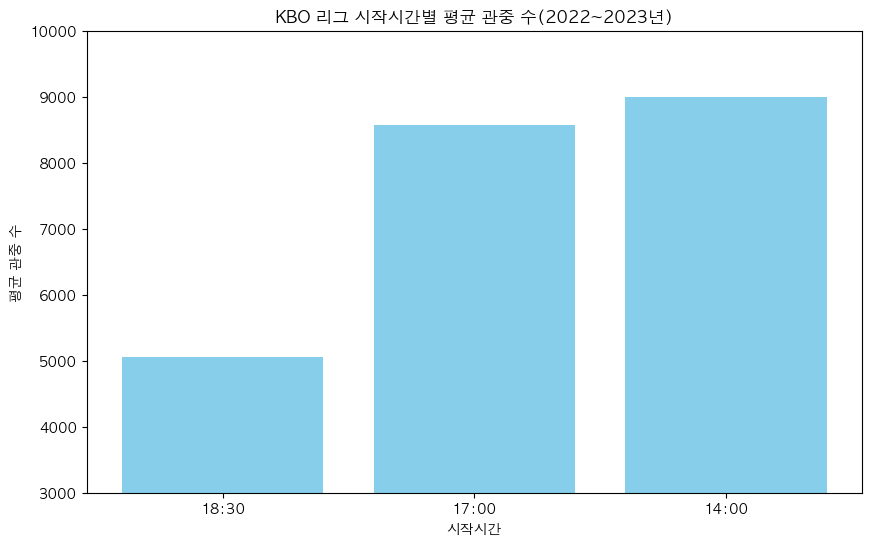

In [22]:
# 데이터 불러오기 (kiwoom_2022_2023 DataFrame)
data = kiwoom_2022_2023.groupby('시작시간')['관중 수'].mean().sort_values()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='skyblue')  # 요일 이름 사용
plt.xlabel("시작시간")
plt.ylabel("평균 관중 수")
plt.ylim(3000,10000)
plt.title("KBO 리그 시작시간별 평균 관중 수(2022~2023년)")

# 그래프 표시
plt.show()

> 18:30이 가장 평균 관중 수가 가장 낮고, 14:00이 가장 높다. <br>
> 상관 관계를 위해 위의 데이터를 수치화 작업하자 <br>
> 18:30 -> 1<br>
> 17:00 -> 2<br>
> 14:00 -> 3<br>

In [23]:
# 변환 맵 정의
day_mapping = {
    '18:30': 1,
    '17:00': 2,
    '14:00': 3
}

# 변환 적용
kiwoom_2022_2023['시작시간'].replace(day_mapping, inplace=True)
kiwoom_2024['시작시간'].replace(day_mapping, inplace=True)

In [24]:
kiwoom_2022_2023.head()

,날짜,요일,원정팀,관중 수,시작시간,연도,월
0,2022-04-02,6,롯데,8257,3,2022,4
1,2022-04-03,5,롯데,6115,3,2022,4
2,2022-04-05,3,LG,2298,1,2022,4
3,2022-04-06,2,LG,2304,1,2022,4
4,2022-04-07,1,LG,2055,1,2022,4


In [25]:
kiwoom_2022_2023[['관중 수','요일','시작시간']].corr()

,관중 수,요일,시작시간
관중 수,1.000000,0.437113,0.511349
요일,0.437113,1.000000,0.727718
시작시간,0.511349,0.727718,1.000000


----
#### 주중 경기/주말(공휴일) 경기 나누자

In [26]:
len(kiwoom_2022_2023.loc[(kiwoom_2022_2023['요일'] == 5) | (kiwoom_2022_2023['요일'] == 6)])

49

In [27]:
kiwoom_2022_2023[kiwoom_2022_2023['연도'] == 2022]

,날짜,요일,원정팀,관중 수,시작시간,연도,월
0,2022-04-02,6,롯데,8257,3,2022,4
1,2022-04-03,5,롯데,6115,3,2022,4
2,2022-04-05,3,LG,2298,1,2022,4
3,2022-04-06,2,LG,2304,1,2022,4
4,2022-04-07,1,LG,2055,1,2022,4
...,...,...,...,...,...,...,...
67,2022-09-20,3,삼성,4851,1,2022,9
68,2022-09-21,2,삼성,5407,1,2022,9
69,2022-09-22,1,두산,3063,1,2022,9
70,2022-09-23,4,두산,4040,1,2022,9


> 2022년 공휴일(월, 주말 제외)<br>
05-05, 06-01, 09-09

In [28]:
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2022-06-01']

,날짜,요일,원정팀,관중 수,시작시간,연도,월
24,2022-06-01,2,삼성,7181,2,2022,6


In [29]:
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2022-09-09']

,날짜,요일,원정팀,관중 수,시작시간,연도,월
62,2022-09-09,4,LG,10074,3,2022,9


In [30]:
kiwoom_2022_2023[kiwoom_2022_2023['연도'] == 2023]

,날짜,요일,원정팀,관중 수,시작시간,연도,월
72,2023-04-01,6,한화,16000,3,2023,4
73,2023-04-02,5,한화,11562,3,2023,4
74,2023-04-04,3,LG,4510,1,2023,4
75,2023-04-05,2,LG,4194,1,2023,4
76,2023-04-06,1,LG,4556,1,2023,4
...,...,...,...,...,...,...,...
138,2023-09-21,1,NC,5178,1,2023,9
139,2023-09-28,1,SSG,7082,2,2023,9
140,2023-09-29,4,KIA,14472,3,2023,9
141,2023-10-07,6,LG,13301,2,2023,10


> 2022년 공휴일(월, 주말 제외)<br>
05-05, 06-06, 08-15, 09-28, 09-29

In [31]:
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2023-05-05']

,날짜,요일,원정팀,관중 수,시작시간,연도,월
86,2023-05-05,4,SSG,16000,3,2023,5


In [32]:
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2023-06-06']

,날짜,요일,원정팀,관중 수,시작시간,연도,월
98,2023-06-06,3,LG,14903,3,2023,6


In [33]:
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2023-09-28']

,날짜,요일,원정팀,관중 수,시작시간,연도,월
139,2023-09-28,1,SSG,7082,2,2023,9


In [34]:
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2023-09-29']

,날짜,요일,원정팀,관중 수,시작시간,연도,월
140,2023-09-29,4,KIA,14472,3,2023,9


In [35]:
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2022-06-01']
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2022-09-09']
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2023-05-05']
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2023-06-06']
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2023-09-28']
kiwoom_2022_2023[kiwoom_2022_2023['날짜'] == '2023-09-29']

,날짜,요일,원정팀,관중 수,시작시간,연도,월
140,2023-09-29,4,KIA,14472,3,2023,9


In [36]:
kiwoom_2022_2023['주중/주말(공휴일)'] = ''

In [37]:
holidays = ['2022-06-01', '2022-09-09', '2023-05-05', '2023-06-06', '2023-09-28', '2023-09-29']

for holiday in holidays:
    kiwoom_2022_2023.loc[kiwoom_2022_2023['날짜'] == holiday, '주중/주말(공휴일)'] = 1

In [38]:
kiwoom_2022_2023.loc[kiwoom_2022_2023['요일'] == 5, '주중/주말(공휴일)'] = 1
kiwoom_2022_2023

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일)
0,2022-04-02,6,롯데,8257,3,2022,4,
1,2022-04-03,5,롯데,6115,3,2022,4,1
2,2022-04-05,3,LG,2298,1,2022,4,
3,2022-04-06,2,LG,2304,1,2022,4,
4,2022-04-07,1,LG,2055,1,2022,4,
...,...,...,...,...,...,...,...,...
138,2023-09-21,1,NC,5178,1,2023,9,
139,2023-09-28,1,SSG,7082,2,2023,9,1
140,2023-09-29,4,KIA,14472,3,2023,9,1
141,2023-10-07,6,LG,13301,2,2023,10,


In [39]:
kiwoom_2022_2023.loc[kiwoom_2022_2023['요일'] == 6, '주중/주말(공휴일)'] = 1
kiwoom_2022_2023

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일)
0,2022-04-02,6,롯데,8257,3,2022,4,1
1,2022-04-03,5,롯데,6115,3,2022,4,1
2,2022-04-05,3,LG,2298,1,2022,4,
3,2022-04-06,2,LG,2304,1,2022,4,
4,2022-04-07,1,LG,2055,1,2022,4,
...,...,...,...,...,...,...,...,...
138,2023-09-21,1,NC,5178,1,2023,9,
139,2023-09-28,1,SSG,7082,2,2023,9,1
140,2023-09-29,4,KIA,14472,3,2023,9,1
141,2023-10-07,6,LG,13301,2,2023,10,1


In [40]:
kiwoom_2022_2023.loc[kiwoom_2022_2023['주중/주말(공휴일)'] != 1, '주중/주말(공휴일)'] = 0
kiwoom_2022_2023

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일)
0,2022-04-02,6,롯데,8257,3,2022,4,1
1,2022-04-03,5,롯데,6115,3,2022,4,1
2,2022-04-05,3,LG,2298,1,2022,4,0
3,2022-04-06,2,LG,2304,1,2022,4,0
4,2022-04-07,1,LG,2055,1,2022,4,0
...,...,...,...,...,...,...,...,...
138,2023-09-21,1,NC,5178,1,2023,9,0
139,2023-09-28,1,SSG,7082,2,2023,9,1
140,2023-09-29,4,KIA,14472,3,2023,9,1
141,2023-10-07,6,LG,13301,2,2023,10,1


In [41]:
kiwoom_2022_2023['주중/주말(공휴일)'].isnull().sum()

0

In [42]:
kiwoom_2022_2023['주중/주말(공휴일)'] = kiwoom_2022_2023['주중/주말(공휴일)'].astype('int')
kiwoom_2022_2023

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일)
0,2022-04-02,6,롯데,8257,3,2022,4,1
1,2022-04-03,5,롯데,6115,3,2022,4,1
2,2022-04-05,3,LG,2298,1,2022,4,0
3,2022-04-06,2,LG,2304,1,2022,4,0
4,2022-04-07,1,LG,2055,1,2022,4,0
...,...,...,...,...,...,...,...,...
138,2023-09-21,1,NC,5178,1,2023,9,0
139,2023-09-28,1,SSG,7082,2,2023,9,1
140,2023-09-29,4,KIA,14472,3,2023,9,1
141,2023-10-07,6,LG,13301,2,2023,10,1


In [43]:
kiwoom_2022_2023[['관중 수','주중/주말(공휴일)','요일','시작시간']].corr()

,관중 수,주중/주말(공휴일),요일,시작시간
관중 수,1.000000,0.529363,0.437113,0.511349
주중/주말(공휴일),0.529363,1.000000,0.788544,0.944333
요일,0.437113,0.788544,1.000000,0.727718
시작시간,0.511349,0.944333,0.727718,1.000000


In [44]:
kiwoom_2024

,날짜,요일,원정팀,관중 수,시작시간,연도,월
0,2024-03-29,4,LG,8465,1,2024,3
1,2024-03-30,6,LG,13462,2,2024,3
2,2024-03-31,5,LG,11822,3,2024,3
3,2024-04-05,4,한화,16000,1,2024,4
4,2024-04-06,6,한화,16000,2,2024,4
5,2024-04-07,5,한화,16000,3,2024,4
6,2024-04-12,4,롯데,8838,1,2024,4
7,2024-04-13,6,롯데,14197,2,2024,4
8,2024-04-14,5,롯데,12333,3,2024,4
9,2024-04-16,3,KT,2877,1,2024,4


In [45]:
kiwoom_2024.loc[kiwoom_2024['요일'] == 5, '주중/주말(공휴일)'] = 1
kiwoom_2024

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일)
0,2024-03-29,4,LG,8465,1,2024,3,NaN
1,2024-03-30,6,LG,13462,2,2024,3,NaN
2,2024-03-31,5,LG,11822,3,2024,3,1.0
3,2024-04-05,4,한화,16000,1,2024,4,NaN
4,2024-04-06,6,한화,16000,2,2024,4,NaN
5,2024-04-07,5,한화,16000,3,2024,4,1.0
6,2024-04-12,4,롯데,8838,1,2024,4,NaN
7,2024-04-13,6,롯데,14197,2,2024,4,NaN
8,2024-04-14,5,롯데,12333,3,2024,4,1.0
9,2024-04-16,3,KT,2877,1,2024,4,NaN


In [46]:
kiwoom_2024.loc[kiwoom_2024['요일'] == 6, '주중/주말(공휴일)'] = 1
kiwoom_2024

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일)
0,2024-03-29,4,LG,8465,1,2024,3,NaN
1,2024-03-30,6,LG,13462,2,2024,3,1.0
2,2024-03-31,5,LG,11822,3,2024,3,1.0
3,2024-04-05,4,한화,16000,1,2024,4,NaN
4,2024-04-06,6,한화,16000,2,2024,4,1.0
5,2024-04-07,5,한화,16000,3,2024,4,1.0
6,2024-04-12,4,롯데,8838,1,2024,4,NaN
7,2024-04-13,6,롯데,14197,2,2024,4,1.0
8,2024-04-14,5,롯데,12333,3,2024,4,1.0
9,2024-04-16,3,KT,2877,1,2024,4,NaN


In [47]:
kiwoom_2024.loc[kiwoom_2024['주중/주말(공휴일)'] != 1, '주중/주말(공휴일)'] = 0
kiwoom_2024

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일)
0,2024-03-29,4,LG,8465,1,2024,3,0.0
1,2024-03-30,6,LG,13462,2,2024,3,1.0
2,2024-03-31,5,LG,11822,3,2024,3,1.0
3,2024-04-05,4,한화,16000,1,2024,4,0.0
4,2024-04-06,6,한화,16000,2,2024,4,1.0
5,2024-04-07,5,한화,16000,3,2024,4,1.0
6,2024-04-12,4,롯데,8838,1,2024,4,0.0
7,2024-04-13,6,롯데,14197,2,2024,4,1.0
8,2024-04-14,5,롯데,12333,3,2024,4,1.0
9,2024-04-16,3,KT,2877,1,2024,4,0.0


In [48]:
kiwoom_2024['주중/주말(공휴일)'] = kiwoom_2024['주중/주말(공휴일)'].astype('int')
kiwoom_2024

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일)
0,2024-03-29,4,LG,8465,1,2024,3,0
1,2024-03-30,6,LG,13462,2,2024,3,1
2,2024-03-31,5,LG,11822,3,2024,3,1
3,2024-04-05,4,한화,16000,1,2024,4,0
4,2024-04-06,6,한화,16000,2,2024,4,1
5,2024-04-07,5,한화,16000,3,2024,4,1
6,2024-04-12,4,롯데,8838,1,2024,4,0
7,2024-04-13,6,롯데,14197,2,2024,4,1
8,2024-04-14,5,롯데,12333,3,2024,4,1
9,2024-04-16,3,KT,2877,1,2024,4,0


In [49]:
kiwoom_2022_2023['원정팀'].unique()

array(['롯데', 'LG', 'NC', 'KIA', 'KT', 'SSG', '두산', '한화', '삼성'],
      dtype=object)

In [50]:
# One-Hot Encoding 작업
# 원정팀
away_encoding = pd.get_dummies(kiwoom_2022_2023['원정팀'])
kiwoom_2022_2023 = kiwoom_2022_2023.join(away_encoding)

In [51]:
# One-Hot Encoding 작업
# 원정팀
away_encoding = pd.get_dummies(kiwoom_2024['원정팀'])
kiwoom_2024 = kiwoom_2024.join(away_encoding)

In [52]:
# # One-Hot Encoding 작업
# # 요일
# day_of_week_encoding = pd.get_dummies(kiwoom['요일'])
# kiwoom = kiwoom.join(day_of_week_encoding)
# # 원정팀
# away_encoding = pd.get_dummies(kiwoom['원정팀'])
# kiwoom = kiwoom.join(away_encoding)
# # 시작시간
# start_time_encoding = pd.get_dummies(kiwoom['시작시간'])
# kiwoom = kiwoom.join(start_time_encoding)
# # 월
# month_encoding = pd.get_dummies(kiwoom['월'])
# kiwoom = kiwoom.join(month_encoding)

In [53]:
kiwoom_2022_2023.head()

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일),KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화
0,2022-04-02,6,롯데,8257,3,2022,4,1,False,False,False,False,False,False,True,False,False
1,2022-04-03,5,롯데,6115,3,2022,4,1,False,False,False,False,False,False,True,False,False
2,2022-04-05,3,LG,2298,1,2022,4,0,False,False,True,False,False,False,False,False,False
3,2022-04-06,2,LG,2304,1,2022,4,0,False,False,True,False,False,False,False,False,False
4,2022-04-07,1,LG,2055,1,2022,4,0,False,False,True,False,False,False,False,False,False


In [54]:
kiwoom_2024.head()

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일),KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화
0,2024-03-29,4,LG,8465,1,2024,3,0,False,False,True,False,False,False,False,False,False
1,2024-03-30,6,LG,13462,2,2024,3,1,False,False,True,False,False,False,False,False,False
2,2024-03-31,5,LG,11822,3,2024,3,1,False,False,True,False,False,False,False,False,False
3,2024-04-05,4,한화,16000,1,2024,4,0,False,False,False,False,False,False,False,False,True
4,2024-04-06,6,한화,16000,2,2024,4,1,False,False,False,False,False,False,False,False,True


In [55]:
# 분리 되었는지 확인
kiwoom_2022_2023['연도'].unique()

array([2022, 2023], dtype=int32)

In [56]:
# 분리 되었는지 확인
kiwoom_2024['연도'].unique()

array([2024], dtype=int32)

In [57]:
# # '연도' 열을 One-Hot Encoding으로 변환.
# year_encoding = pd.get_dummies(kiwoom['연도'], drop_first=True)
# kiwoom = kiwoom.join(year_encoding)

In [58]:
kiwoom_2022_2023

,날짜,요일,원정팀,관중 수,시작시간,연도,월,주중/주말(공휴일),KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화
0,2022-04-02,6,롯데,8257,3,2022,4,1,False,False,False,False,False,False,True,False,False
1,2022-04-03,5,롯데,6115,3,2022,4,1,False,False,False,False,False,False,True,False,False
2,2022-04-05,3,LG,2298,1,2022,4,0,False,False,True,False,False,False,False,False,False
3,2022-04-06,2,LG,2304,1,2022,4,0,False,False,True,False,False,False,False,False,False
4,2022-04-07,1,LG,2055,1,2022,4,0,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2023-09-21,1,NC,5178,1,2023,9,0,False,False,False,True,False,False,False,False,False
139,2023-09-28,1,SSG,7082,2,2023,9,1,False,False,False,False,True,False,False,False,False
140,2023-09-29,4,KIA,14472,3,2023,9,1,True,False,False,False,False,False,False,False,False
141,2023-10-07,6,LG,13301,2,2023,10,1,False,False,True,False,False,False,False,False,False


In [59]:
# 2022-2023년 데이터 정리
# One-Hot Encoding 부분을 boolean에서 int로 변환
kiwoom_2022_2023.iloc[:,8:] = kiwoom_2022_2023.iloc[:,8:].astype('int')
# column 이름 문자열로 바꾸기
kiwoom_2022_2023.columns = kiwoom_2022_2023.columns.astype(str)
# Target인 관중 수를 제외한 나머지 원본 Feature 부분 제외하고 데이터 불러오기
kiwoom_2022_2023 = pd.concat([kiwoom_2022_2023['관중 수'],kiwoom_2022_2023['요일'],kiwoom_2022_2023['시작시간'],kiwoom_2022_2023['주중/주말(공휴일)'],kiwoom_2022_2023.iloc[:,8:]],axis=1)
kiwoom_2022_2023.head(10)

,관중 수,요일,시작시간,주중/주말(공휴일),KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화
0,8257,6,3,1,0,0,0,0,0,0,1,0,0
1,6115,5,3,1,0,0,0,0,0,0,1,0,0
2,2298,3,1,0,0,0,1,0,0,0,0,0,0
3,2304,2,1,0,0,0,1,0,0,0,0,0,0
4,2055,1,1,0,0,0,1,0,0,0,0,0,0
5,774,3,1,0,0,0,0,1,0,0,0,0,0
6,893,2,1,0,0,0,0,1,0,0,0,0,0
7,1020,1,1,0,0,0,0,1,0,0,0,0,0
8,4289,4,1,0,1,0,0,0,0,0,0,0,0
9,8338,6,3,1,1,0,0,0,0,0,0,0,0


In [60]:
# 2024년 데이터 정리
# One-Hot Encoding 부분을 boolean에서 int로 변환
kiwoom_2024.iloc[:,8:] = kiwoom_2024.iloc[:,8:].astype('int')
# column 이름 문자열로 바꾸기
kiwoom_2024.columns = kiwoom_2024.columns.astype(str)
# Target인 관중 수를 제외한 나머지 원본 Feature 부분 제외하고 데이터 불러오기
kiwoom_2024 = pd.concat([kiwoom_2024['관중 수'],kiwoom_2024['요일'],kiwoom_2024['시작시간'],kiwoom_2024['주중/주말(공휴일)'],kiwoom_2024.iloc[:,8:]],axis=1)
kiwoom_2024.head(10)

,관중 수,요일,시작시간,주중/주말(공휴일),KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화
0,8465,4,1,0,0,0,1,0,0,0,0,0,0
1,13462,6,2,1,0,0,1,0,0,0,0,0,0
2,11822,5,3,1,0,0,1,0,0,0,0,0,0
3,16000,4,1,0,0,0,0,0,0,0,0,0,1
4,16000,6,2,1,0,0,0,0,0,0,0,0,1
5,16000,5,3,1,0,0,0,0,0,0,0,0,1
6,8838,4,1,0,0,0,0,0,0,0,1,0,0
7,14197,6,2,1,0,0,0,0,0,0,1,0,0
8,12333,5,3,1,0,0,0,0,0,0,1,0,0
9,2877,3,1,0,0,1,0,0,0,0,0,0,0


In [61]:
kiwoom_2022_2023.corr()

,관중 수,요일,시작시간,주중/주말(공휴일),KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화
관중 수,1.000000,0.437113,0.511349,0.529363,0.204403,-0.314113,-0.003791,-0.261698,0.140877,-0.142721,0.234711,-0.010920,0.156919
요일,0.437113,1.000000,0.727718,0.788544,-0.023093,-0.009891,-0.114825,0.016220,0.134160,-0.195993,0.064550,-0.036198,0.163805
시작시간,0.511349,0.727718,1.000000,0.944333,-0.019786,-0.050994,-0.019786,0.006412,0.163600,-0.199814,0.048219,-0.045984,0.122629
주중/주말(공휴일),0.529363,0.788544,0.944333,1.000000,-0.036084,-0.023914,-0.036084,0.010825,0.198464,-0.201564,0.020498,-0.036084,0.109323
KIA,0.204403,-0.023093,-0.019786,-0.036084,1.000000,-0.125742,-0.117188,-0.117187,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742
KT,-0.314113,-0.009891,-0.050994,-0.023914,-0.125742,1.000000,-0.125742,-0.125742,-0.125742,-0.134921,-0.134921,-0.125742,-0.134921
LG,-0.003791,-0.114825,-0.019786,-0.036084,-0.117188,-0.125742,1.000000,-0.117187,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742
NC,-0.261698,0.016220,0.006412,0.010825,-0.117187,-0.125742,-0.117187,1.000000,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742
SSG,0.140877,0.134160,0.163600,0.198464,-0.117187,-0.125742,-0.117187,-0.117187,1.000000,-0.125742,-0.125742,-0.117187,-0.125742
두산,-0.142721,-0.195993,-0.199814,-0.201564,-0.125742,-0.134921,-0.125742,-0.125742,-0.125742,1.000000,-0.134921,-0.125742,-0.134921


In [62]:
# 2022-2023 데이터 임시 저장
# kiwoom_2022_2023.to_csv('./Data/2022-2023_One-hot.csv')

----
## 관중 수 범위 찾기

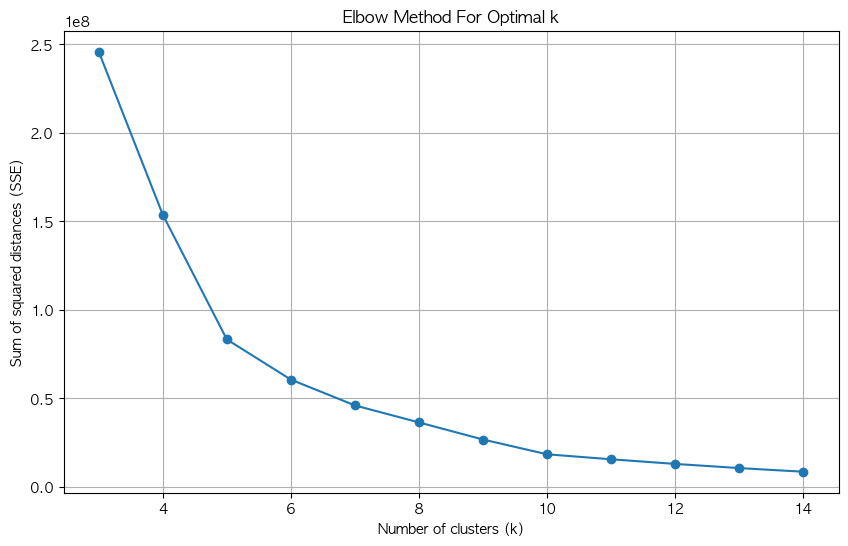

In [63]:
# k-mean로 관중 수 범위 나눌 k 값 찾기
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 전처리: 타깃 컬럼과 피쳐 컬럼 분리
# features = kiwoom_2022_2023.drop(columns=['날짜','원정팀','연도','월','관중 수'])
features = kiwoom_2022_2023.drop(columns=['관중 수'])
target = kiwoom_2022_2023['관중 수']

attendance_shape = np.array(target).reshape(-1,1)

# 특성 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(attendance_shape)

# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(3, 15)  # 3부터 10까지의 k 값에 대해 확인

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    # kmeans.fit(features_scaled)
    kmeans.fit(attendance_shape)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


> k값의 최적은 5이므로, 관중 수는 5구간으로 나누는 것이 적합.

In [64]:
# K-means 클러스터링
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(attendance_shape)
clusters

# 클러스터 라벨을 데이터프레임에 추가
kiwoom_2022_2023['Cluster'] = clusters

# 각 클러스터의 관중 수 범위 계산
cluster_ranges = {}

for cluster in range(5):
    cluster_data = kiwoom_2022_2023[kiwoom_2022_2023['Cluster'] == cluster]
    min_attendance = cluster_data['관중 수'].min()
    max_attendance = cluster_data['관중 수'].max()
    cluster_ranges[cluster] = (min_attendance, max_attendance)

# 클러스터의 관중 수 범위를 정렬
sorted_cluster_ranges = sorted(cluster_ranges.items(), key=lambda x: x[1])
sorted_cluster_ranges

[(1, (774, 3238)),
 (3, (3564, 5952)),
 (0, (6064, 8817)),
 (4, (9442, 12545)),
 (2, (13301, 16000))]

> 관중 수를 클러스터링으로 분류 결과 <br>  
~3500 -> 1 <br>
3500~6000 -> 2 <br>
6000~9000 -> 3 <br>
9000~13000 -> 4 <br>
13000~ -> 5 <br>

In [65]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2022_2023['관중수 분류'] = pd.cut(kiwoom_2022_2023['관중 수'], 
                                    bins=[0, 3500, 6000, 9000, 13000, float('inf')], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=False)

In [66]:
kiwoom_2022_2023 = kiwoom_2022_2023.drop(['Cluster','관중 수'], axis=1)
kiwoom_2022_2023

,요일,시작시간,주중/주말(공휴일),KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,관중수 분류
0,6,3,1,0,0,0,0,0,0,1,0,0,3
1,5,3,1,0,0,0,0,0,0,1,0,0,3
2,3,1,0,0,0,1,0,0,0,0,0,0,1
3,2,1,0,0,0,1,0,0,0,0,0,0,1
4,1,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,0,0,0,0,1,0,0,0,0,0,2
139,1,2,1,0,0,0,0,1,0,0,0,0,3
140,4,3,1,1,0,0,0,0,0,0,0,0,5
141,6,2,1,0,0,1,0,0,0,0,0,0,5


In [67]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2024['관중수 분류'] = pd.cut(kiwoom_2024['관중 수'], 
                                    bins=[0, 3500, 6000, 9000, 13000, float('inf')], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=False)

In [68]:
kiwoom_2024 = kiwoom_2024.drop(['관중 수'], axis=1)
kiwoom_2024

,요일,시작시간,주중/주말(공휴일),KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,관중수 분류
0,4,1,0,0,0,1,0,0,0,0,0,0,3
1,6,2,1,0,0,1,0,0,0,0,0,0,5
2,5,3,1,0,0,1,0,0,0,0,0,0,4
3,4,1,0,0,0,0,0,0,0,0,0,1,5
4,6,2,1,0,0,0,0,0,0,0,0,1,5
5,5,3,1,0,0,0,0,0,0,0,0,1,5
6,4,1,0,0,0,0,0,0,0,1,0,0,3
7,6,2,1,0,0,0,0,0,0,1,0,0,5
8,5,3,1,0,0,0,0,0,0,1,0,0,4
9,3,1,0,0,1,0,0,0,0,0,0,0,1


In [69]:
# plt.scatter(
#     x=kiwoom_2022_2023.index,
#     y=kiwoom_2022_2023['관중 수'],
#     c=clusters
# )

----
# 예측


In [70]:
# 각 column별 상관계수 확인
kiwoom_2022_2023.corr()
# kiwoom_2022_2023[['관중 수','주중/주말(공휴일)','요일','시작시간','관중석 분류']].corr()

,요일,시작시간,주중/주말(공휴일),KIA,KT,LG,NC,SSG,두산,롯데,삼성,한화,관중수 분류
요일,1.000000,0.727718,0.788544,-0.023093,-0.009891,-0.114825,0.016220,0.134160,-0.195993,0.064550,-0.036198,0.163805,0.426327
시작시간,0.727718,1.000000,0.944333,-0.019786,-0.050994,-0.019786,0.006412,0.163600,-0.199814,0.048219,-0.045984,0.122629,0.490019
주중/주말(공휴일),0.788544,0.944333,1.000000,-0.036084,-0.023914,-0.036084,0.010825,0.198464,-0.201564,0.020498,-0.036084,0.109323,0.522186
KIA,-0.023093,-0.019786,-0.036084,1.000000,-0.125742,-0.117188,-0.117187,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742,0.207764
KT,-0.009891,-0.050994,-0.023914,-0.125742,1.000000,-0.125742,-0.125742,-0.125742,-0.134921,-0.134921,-0.125742,-0.134921,-0.322316
LG,-0.114825,-0.019786,-0.036084,-0.117188,-0.125742,1.000000,-0.117187,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742,0.005928
NC,0.016220,0.006412,0.010825,-0.117187,-0.125742,-0.117187,1.000000,-0.117187,-0.125742,-0.125742,-0.117188,-0.125742,-0.236276
SSG,0.134160,0.163600,0.198464,-0.117187,-0.125742,-0.117187,-0.117187,1.000000,-0.125742,-0.125742,-0.117187,-0.125742,0.167397
두산,-0.195993,-0.199814,-0.201564,-0.125742,-0.134921,-0.125742,-0.125742,-0.125742,1.000000,-0.134921,-0.125742,-0.134921,-0.150334
롯데,0.064550,0.048219,0.020498,-0.125742,-0.134921,-0.125742,-0.125742,-0.125742,-0.134921,1.000000,-0.125742,-0.134921,0.231848


In [71]:
# Randomforest 회귀모델로 정확도율 구하기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 데이터 준비 (x는 피쳐, y는 타겟)
x = kiwoom_2022_2023.drop(['관중 수'], axis=1)
y = kiwoom_2022_2023['관중 수']

# 학습 데이터와 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 랜덤 포레스트 회귀모델 학습
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(x_test)

# 오차 계산 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

# MAPE 계산 함수 정의
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print(y_pred.round(0))
    print(y_true)
    # return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return (1 - np.mean(np.abs((y_true - y_pred) / y_true))) * 100


# MAPE 계산
mape = mean_absolute_percentage_error(y_test, y_pred)
print("정확도율:", mape.round(0), "%")

KeyError: "['관중 수'] not found in axis"

----
### 랜덤포레스트 클러스터링 예측

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [73]:
# 데이터 준비 (x는 피쳐, y는 타겟)
# x = kiwoom_2022_2023.drop(['날짜','원정팀','연도','월','관중 수','관중석 분류'], axis=1)
# x = kiwoom_2022_2023.drop(['날짜','원정팀','연도','월','관중석 분류'], axis=1)
x = kiwoom_2022_2023.drop(['관중수 분류'], axis=1)
y = kiwoom_2022_2023['관중수 분류']

# 실제 데이터 준비
# test_x = kiwoom_2024.drop(['날짜','원정팀','연도','월','관중 수','관중석 분류'], axis=1)
test_x = kiwoom_2024.drop(['관중수 분류'], axis=1)
test_y = kiwoom_2024['관중수 분류']

In [ ]:

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# SVM 모델 생성
svm = SVC()

# 교차 검증 수행 및 평가
scores = cross_val_score(svm, X, y, cv=5)
print("교차 검증 점수:", scores)
print("평균 교차 검증 점수:", scores.mean())

In [101]:
# 학습 데이터와 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 랜덤 포레스트 분류모델 학습
svm_clf = SVC()
# rf_clf_01 = RandomForestClassifier()
svm_clf.fit(x_train, y_train)
# rf_clf.fit(x, y)

# 테스트 데이터에 대한 예측
# y_pred = rf_clf.predict(x_test)
# y_pred_t = rf_clf.predict(test_x)
scores = cross_val_score(svm_clf, x_test, y_test, cv=5)

print("교차 검증 점수:", scores*100)
print(f"평균 교차 검증 점수:{round(scores.mean()*100)}%")    

# 정확도 계산
# accuracy = accuracy_score(y_test, y_pred)
# accuracy_t = accuracy_score(test_y, y_pred_t)
# print(f"학습예측율 : {scores * 100:.2f}%({i+1}회)")
# print(f"학습예측율 : {accuracy * 100:.2f}%({i+1}회)")
# print(f"실제예측율 : {accuracy * 100:.2f}%({i+1}회)")

교차 검증 점수: [33.33333333 33.33333333 33.33333333 50.         20.        ]
평균 교차 검증 점수:34%


In [ ]:
# Train용 함수
def trainML(model):
    # 5번 반복하여 학습 및 평가
    for i in range(5):

        # 학습 데이터와 테스트 데이터로 분리
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        
        # 랜덤 포레스트 분류모델 학습
        dtree = model
        dtree.fit(x_train, y_train)

        # 테스트 데이터에 대한 예측
        y_pred = dtree.predict(x_test)

        # 정확도 계산
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"예측율 : {accuracy * 100:.2f}%({i+1}회)")

----
### 랜덤포레스트

In [ ]:
trainML(RandomForestClassifier())

----
### 의사결정나무

In [ ]:
trainML(tree.DecisionTreeClassifier())

----
### KNN

In [ ]:
trainML(KNeighborsClassifier(n_neighbors=5))

----
### SVM

In [ ]:
trainML(SVC(probability=True).fit(x, y))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier

In [ ]:
# 학습 데이터와 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 특성 만들기
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)

# 데이터 스케일링
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [ ]:
def train_ML(model):
    # 5번 반복하여 학습 및 평가
    for i in range(5):

        # 분류기 학습
        clf = model
        clf.fit(train_scaled, y_train)

        # 테스트 데이터 예측
        test_pred = clf.predict(test_scaled)

        # 정확도 계산
        accuracy = accuracy_score(y_test, test_pred)
        print(f"예측율: {accuracy * 100:.2f}% -- ({i+1}회)")


In [ ]:
# 5번 반복하여 학습 및 평가
for i in range(5):

    # 분류기 학습
    clf = RidgeClassifier()
    clf.fit(train_scaled, y_train)

    # 테스트 데이터 예측
    test_pred = clf.predict(test_scaled)

    # 정확도 계산
    accuracy = accuracy_score(y_test, test_pred)
    print(f"예측율: {accuracy * 100:.2f}% -- ({i+1}회)")

In [ ]:
# 5번 반복하여 학습 및 평가
for i in range(5):

    # 분류기 학습
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(train_scaled, y_train)

    # 테스트 데이터 예측
    test_pred = clf.predict(test_scaled)

    # 정확도 계산
    accuracy = accuracy_score(y_test, test_pred)
    print(f"예측율: {accuracy * 100:.2f}% -- ({i+1}회)")

In [ ]:
# Feature
kiwoom_2022_2023_input = kiwoom_2022_2023.drop(['관중 수','관중석 분류'], axis=1).to_numpy()
kiwoom_2022_2023_input[:5]

In [ ]:
# Target Data
kiwoom_2022_2023_target = kiwoom_2022_2023['관중석 분류'].to_numpy()
kiwoom_2022_2023_target[:5]

In [ ]:
# Train과 Test 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(kiwoom_2022_2023_input, kiwoom_2022_2023_target, stratify=kiwoom_2022_2023_target, random_state=42)

In [ ]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(
    loss='log', # 로지스틱 손실함수
    # loss='log_loss', # 로지스틱 손실함수
    max_iter=10, # 반복 횟수
    random_state=42
    )

In [ ]:
sc.fit(train_scaled, train_target)

In [ ]:
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

In [ ]:
sc.partial_fit(train_scaled, train_target)
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
# sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []

classes = np.unique(train_target)
classes

In [ ]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [ ]:
# 그래프로
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)

plt.show()

In [ ]:
# 새롭게 시작
sc = SGDClassifier(
    loss='log',
    # loss='log_loss',
    max_iter=100,
    random_state=42,
    tol=None # 조기종료 시점이나 현재는 정지기준이 없고 반복기간동안의 최적의 손실값보다 큰 경우 조기 종료.
)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

In [ ]:
# 새롭게 시작
sc = SGDClassifier(
    loss='hinge', # SVM
    # loss='log_loss',
    max_iter=100,
    random_state=42,
    tol=1.0e-2 # 기본값.
)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

In [ ]:
# 새롭게 시작
sc = SGDClassifier(
    loss='perceptron', # SVM
    # loss='log_loss',
    max_iter=100,
    random_state=42,
    tol=1.0e-2 # 기본값.
)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))